In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Import the dataset
data = pd.read_csv("Advertising.csv", index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


# TV Simple Linear Model

In [2]:
# Select data and reshape
x = data.iloc[:,0].values
y = data.iloc[:,3].values
x = x.reshape(-1,1)
y = y.reshape(-1,1)

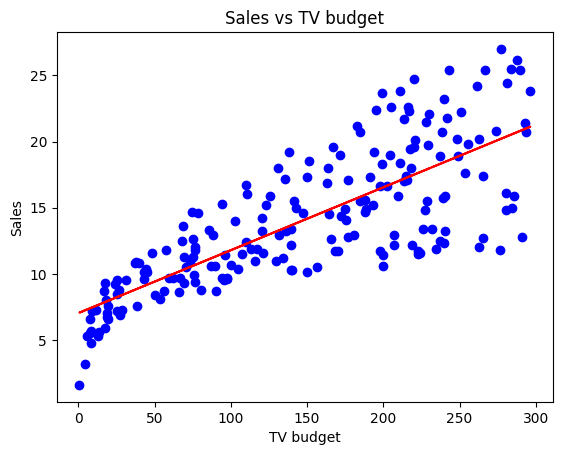

In [3]:
# Create an empty linear regression model
tv_model = LinearRegression()
tv_model.fit(x,y)
y_pred = tv_model.predict(x)

# Plot model
plt.scatter(x,y,color='b')
plt.plot(x,y_pred, color='r')
plt.title('Sales vs TV budget')
plt.xlabel('TV budget')
plt.ylabel('Sales')
plt.show()

In [4]:
# TV model coefficients
print('Coefficients: \n', tv_model.coef_)

Coefficients: 
 [[0.04753664]]


# Radio simple linear model

In [5]:
# Select and reshape data 
x = data.iloc[:,1].values
y = data.iloc[:,3].values
x = x.reshape(-1,1)
y = y.reshape(-1,1)

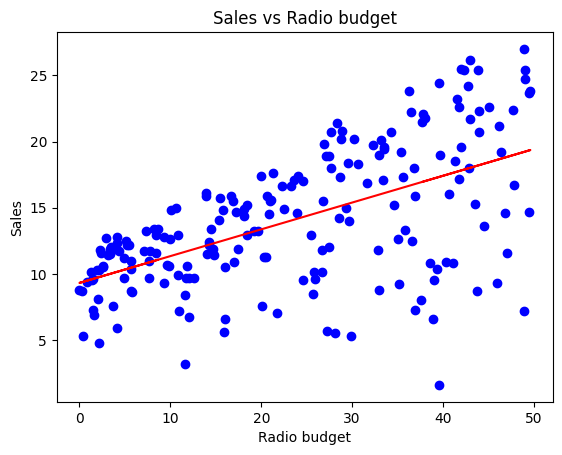

In [6]:
# Create an empty linear regression model and fit
radio_model = LinearRegression()
radio_model.fit(x,y)
y_pred = radio_model.predict(x)

# Plot model and data
plt.scatter(x,y,color='b')
plt.plot(x, y_pred, color='r')
plt.title('Sales vs Radio budget')
plt.xlabel('Radio budget')
plt.ylabel('Sales')
plt.show()

In [7]:
# Radio model coefficients
print('Coefficients: \n', radio_model.coef_)

Coefficients: 
 [[0.20249578]]


# Newspaper Simple Linear model

In [8]:
# Select and reshape data
x = data.iloc[:,2].values
y = data.iloc[:,3].values
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

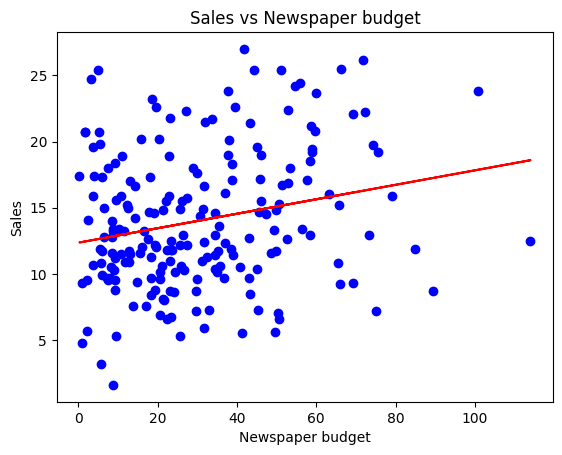

In [9]:
# Create an empty linear regresion model
newspaper_model = LinearRegression()
newspaper_model.fit(x,y)
y_pred = newspaper_model.predict(x)

# Plot model and data
plt.scatter(x,y,color = 'b')
plt.plot(x,y_pred, color = 'r')
plt.title('Sales vs Newspaper budget')
plt.xlabel('Newspaper budget')
plt.ylabel('Sales')
plt.show()

In [10]:
# Newspaper model coefficients
print('Coefficients: \n', newspaper_model.coef_)

Coefficients: 
 [[0.0546931]]


## Multiple Linear Regression

In [11]:
X = data.iloc[:,[0, 1, 2]].values
X[1:4]


array([[ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5]])

In [12]:
# Select and reshape data
y = data.iloc[:,3].values
y = y.reshape(-1, 1)
X =X.reshape(-1, X.shape[1])

# Create an empty linear regression model
advertising_model = LinearRegression()
advertising_model.fit(X,y)

# Get intercept and coeffcients
print('Intercept: \n', advertising_model.intercept_)
print('Coefficients: \n', advertising_model.coef_)


Intercept: 
 [2.93888937]
Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]


## Training and test samples

In [13]:
# Split data into training and test sets
rseed = 23 # Use the same random seed for learning purposes to get the same result
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=rseed)

print('Training data:', X_train.shape, y_train.shape)
print('Test data:', X_test.shape, y_test.shape)

Training data: (150, 3) (150, 1)
Test data: (50, 3) (50, 1)


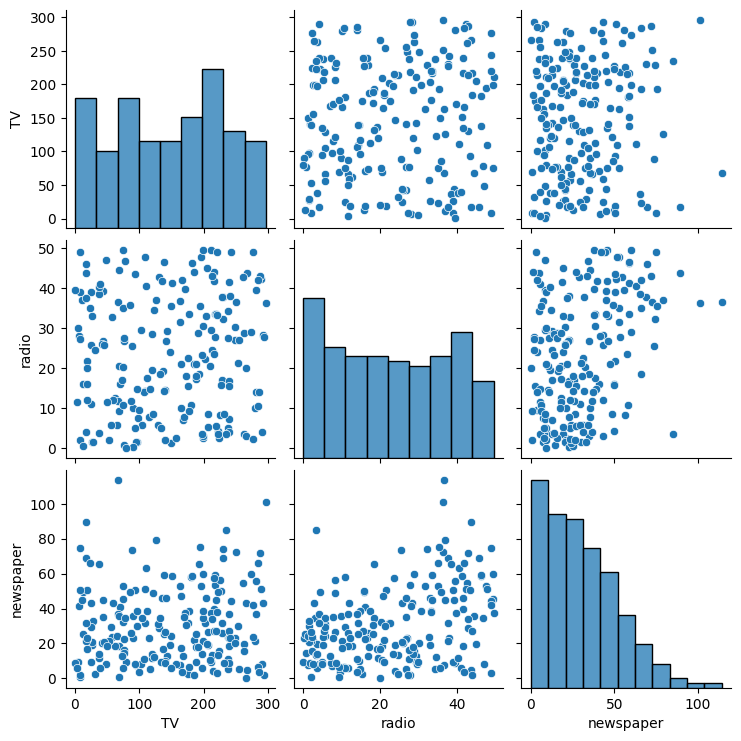

In [14]:
# Plot the distribution of the data
sns.pairplot(data=data.drop('sales', axis=1))

Looks like the features don't follow a Gaussian distribution. Let's nnormalise our data using `MinMaxScaler`. Note that we fit it on the training set; we don't want to fit anything on the test. 

In [16]:
# Fit the scaler on train data
sc = MinMaxScaler()
sc.fit(X_train)

# Apply the scaler on train and test data
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

Using a 0.25 test size split our data of 200 items into a training set of 150 observations and three columns, and a test set of 50 observations. 

## Fit the model on the training data

In [17]:
# Fit a model
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

# Create line coordinates
X_line = np.empty(X_test.shape)
for i in range(X_test.shape[1]):
    X_line[:, i] = np.linspace(np.min(X_test[:,i]), np.max(X_test[:,i]), num=X_test.shape[0])
y_line = lm.predict(X_line)

print('Intercept: \n', lm.intercept_)
print('Coefficients: \n', lm.coef_)

Intercept: 
 [3.03123996]
Coefficients: 
 [[13.45518042  8.82700262  0.19358528]]


In [18]:
# Predictions
predictions[0:5]

array([[10.15914647],
       [21.58406999],
       [18.62679322],
       [13.65075552],
       [18.3315086 ]])

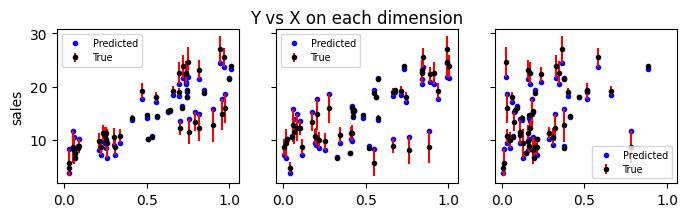

In [19]:
# Plot the errors
fig, ax = plt.subplots(1, X_test.shape[1], sharey=True, sharex=True, figsize=(8,2))
fig.suptitle("Y vs X on each dimension")
ax[0].set_ylabel(data.columns[3])

# Get values for the error bar
error_bar_values = np.abs((y_test-predictions)[:,0])

# Plot data, predicted values, and error bars
for i in range(X_test.shape[1]):
    ax[i].errorbar(X_test[:, i], y_test[:, 0], yerr=error_bar_values, fmt='.k', ecolor='red', label='True')
    ax[i].scatter(X_test[:,i], predictions[:,0], c='b', marker='.', label='Predicted')
    ax[i].legend(loc='best', fontsize='x-small')


In [20]:
# R squared score
print("R2 score:", round(model.score(X_test,y_test), 4))

R2 score: 0.9197
